In [318]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from scipy.stats import linregress
import os
import pandas as pd

In [319]:
filename = 'C954.csv'
name = os.path.splitext(filename)[0]
vmeas, wlmeas, v, λ, f = np.loadtxt(filename,skiprows=1, delimiter=',', unpack=True)

In [320]:
d = 9.54e-3
d2 = d**2

In [321]:
eta = 1.002e-3
rho = 1000
dynamic = eta/rho

In [322]:
Re = []
for i in range(0,len(v)):
    Re.append(((d*v[i])/dynamic))

In [323]:
Ro = []
for i in range(0,len(λ)):
    Ro.append(10*(d2*λ[i])/dynamic)

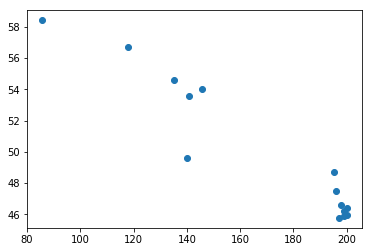

In [324]:
plt.plot(Re,Ro,'o')

In [325]:
stat = linregress(Re,Ro)

In [326]:
stat

LinregressResult(slope=-0.11076052558563558, intercept=68.58553933537657, rvalue=-0.9553517064641449, pvalue=1.0384891667352467e-07, stderr=0.009888854249573394)

In [327]:
x = np.arange(min(Re)-5,max(Re)+5,1)

In [328]:
y = (stat[0]*x + stat[1])
dy = (stat[4]*x)

In [329]:
plt.plot(Re,Ro,'o',label= 'Collected Data')
plt.plot(x,y, label='Fitted Data')
plt.xlabel('Re')
plt.ylabel('Ro')
plt.legend(loc='best')
plt.suptitle(name + ' Roshko vs. Reynolds')
plt.savefig(name + 'RoRe.svg', bbox_inches='tight')
plt.close()

In [330]:
df = pd.DataFrame({"Re" : Re, "Ro" : Ro})
df.to_csv(name+"ReRo.csv", index=False)